In [80]:
from sklearn.datasets import load_iris 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

In [81]:
# Problem 2: Part 1

# Without any preprocessing on X
unprocessed_var_ratio = []
unprocessed_var = []

for k in range(1, 5):
    pca = PCA(n_components=k)
    pca.fit(X)
    
    res_ratio = pca.explained_variance_ratio_
    unprocessed_var_ratio.append(res_ratio)    
    
    res_var = pca.explained_variance_
    unprocessed_var.append(res_var)
    
print("On unprocessed data: (Variance_Ratio) ",unprocessed_var_ratio)
# The ratio is also significantly dropping after k=1 and when compared to preprocessed
# data later is significatly closed in case of later k for MinMaxScaler ahead

print("\n")

print("On unprocessed data: (Variance) ",unprocessed_var)
# Variance for higher k is pretty high and drops down significantly after the k=1



On unprocessed data: (Variance_Ratio)  [array([0.92461872]), array([0.92461872, 0.05306648]), array([0.92461872, 0.05306648, 0.01710261]), array([0.92461872, 0.05306648, 0.01710261, 0.00521218])]


On unprocessed data: (Variance)  [array([4.22824171]), array([4.22824171, 0.24267075]), array([4.22824171, 0.24267075, 0.0782095 ]), array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])]


In [82]:
# Problem 2: Part 2

from sklearn import preprocessing
import numpy as np

# Centering or mean removal using preprocessing.scale from sklearn
X_scaled = preprocessing.scale(X)

preprocessed_var = []
for k in range(1, 5):
    pca = PCA(n_components=k)
    pca.fit(X_scaled)
    res = pca.explained_variance_ratio_
    preprocessed_var.append(res)
    
print("After mean removel: ",preprocessed_var)
print("\n")

# Scaling of a feature to a range [a, b] using MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)

preprocessed_var = []
for k in range(1, 5):
    pca = PCA(n_components=k)
    pca.fit(X_min_max)
    res = pca.explained_variance_ratio_
    preprocessed_var.append(res)
    
print("After scaling using MinMaxScaler: ",preprocessed_var)
print("\n")

# Standardization using standard scaler
standard_scaler = preprocessing.StandardScaler().fit(X)
X_standard = standard_scaler.fit_transform(X)

preprocessed_var = []
for k in range(1, 5):
    pca = PCA(n_components=k)
    pca.fit(X_standard)
    res = pca.explained_variance_ratio_
    preprocessed_var.append(res)
    
print("After using standard scaler: ",preprocessed_var)
print("\n")

# Normalization between 0 and 1 using normalize
X_normalized = preprocessing.normalize(X, norm='l2')

preprocessed_var = []
for k in range(1, 5):
    pca = PCA(n_components=k)
    pca.fit(X_normalized)
    res = pca.explained_variance_ratio_
    preprocessed_var.append(res)
    
print("After normalization: ",preprocessed_var)

# Differences:
# For mean removal and standard scaler, the values are same. Using MinMaxScaler gives
# me some good values but normalize gives me even better values when compared to
# original values in the previous cell calculated on original X. 

# Reason:
# Normalization is generally a better approach is most cases but MinMaxScaler would be 
# a better solution here since values for higher k is better. Also, Normalization and 
# MinMax is almost the same thing when solving for matrices in problem 1 part 2 but 
# here MinMaxScaler is basically on range [0, 1] just like normalization not between
# 0 and 1 though. 

After mean removel:  [array([0.72962445]), array([0.72962445, 0.22850762]), array([0.72962445, 0.22850762, 0.03668922]), array([0.72962445, 0.22850762, 0.03668922, 0.00517871])]


After scaling using MinMaxScaler:  [array([0.84136038]), array([0.84136038, 0.11751808]), array([0.84136038, 0.11751808, 0.03473561]), array([0.84136038, 0.11751808, 0.03473561, 0.00638592])]


After using standard scaler:  [array([0.72962445]), array([0.72962445, 0.22850762]), array([0.72962445, 0.22850762, 0.03668922]), array([0.72962445, 0.22850762, 0.03668922, 0.00517871])]


After normalization:  [array([0.962373]), array([0.962373  , 0.02758655]), array([0.962373  , 0.02758655, 0.00818093]), array([0.962373  , 0.02758655, 0.00818093, 0.00185952])]


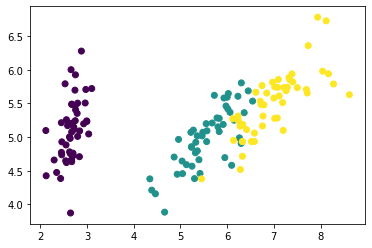

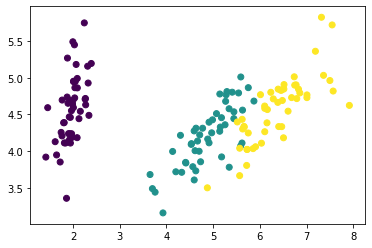

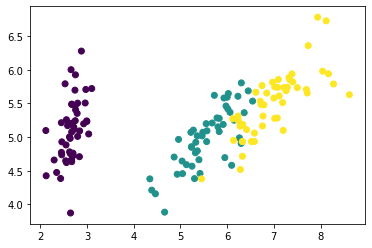

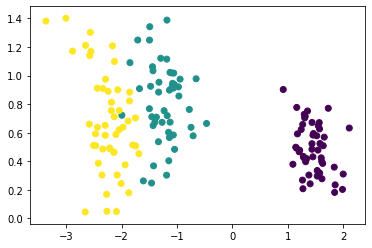

In [83]:
# Problem 2: Part 3

# Mean-removal
pca = PCA(n_components=2)
pca.fit(X_scaled)
pca_projected = pca.transform(X)

x1 = pca_projected[:, 0]
y1 = pca_projected[:, 1]

plt.scatter(x=x1, y=y1, c=y)
plt.show()

# Scaling of feature on range [a, b]
pca = PCA(n_components=2)
pca.fit(X_min_max)
pca_projected = pca.transform(X)

x1 = pca_projected[:, 0]
y1 = pca_projected[:, 1]

plt.scatter(x=x1, y=y1, c=y)
plt.show()

# Standardization
pca = PCA(n_components=2)
pca.fit(X_standard)
pca_projected = pca.transform(X)

x1 = pca_projected[:, 0]
y1 = pca_projected[:, 1]

plt.scatter(x=x1, y=y1, c=y)
plt.show()

# Normalization
pca = PCA(n_components=2)
pca.fit(X_normalized)
pca_projected = pca.transform(X)

x1 = pca_projected[:, 0]
y1 = pca_projected[:, 1]

plt.scatter(x=x1, y=y1, c=y)
plt.show()

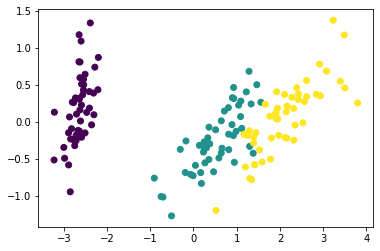

In [84]:
# Without any preprocessing, directly on X
pca = PCA(n_components=2)
pca.fit(X)
pca_projected = pca.transform(X)

x1 = pca_projected[:, 0]
y1 = pca_projected[:, 1]

plt.scatter(x=x1, y=y1, c=y)
plt.show()

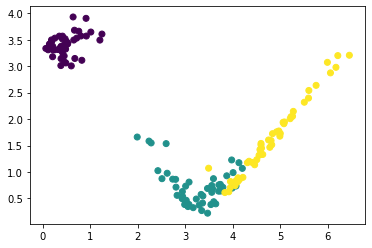

In [109]:
# Problem 2: Part 4
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit_predict(X)
k_means_proj = k_means.transform(X)

x1 = k_means_proj[:, 0]
y1 = k_means_proj[:, 1]

plt.scatter(x=x1, y=y1, c=y)
plt.show()

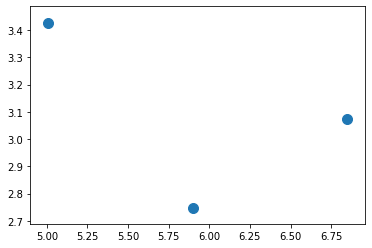

In [122]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit_predict(X)
k_means_proj = k_means.transform(X)

x1 = k_means.cluster_centers_[:, 0]
y1 = k_means.cluster_centers_[:, 1]

plt.scatter(x1, y1, s = 100)
plt.show()